In [43]:
import scqubits as scq
import numpy as np
import matplotlib.pyplot as plt
from modeling.utils.qubits import *

e_charge = 1.60217663e-19

In [44]:
def minimize_func(x, C_sigma = None, target_qubit_frequency = None):
    Ic = get_Ic_from_Lj(x)
    EC = e_charge**2/(C_sigma)/2/planck_h / 1e9
    Ej = Ic*phi0/2/pi/planck_h / 1e9

    tmon = scq.Transmon(EJ = Ej, EC = EC, ng=0.3, ncut=40, truncated_dim=4)
    return tmon.E01() - target_qubit_frequency

In [45]:
def get_zz_cavity_sweep(qubit_detuning, w1):
    Lj1 = fsolve(minimize_func, 14e-9, args =(C_sigma, w1))[0]
    Lj2 = fsolve(minimize_func, 14e-9, args =(C_sigma, w1 + qubit_detuning))[0]
    Ic1 = get_Ic_from_Lj(Lj1)
    Ic2 = get_Ic_from_Lj(Lj2)
    Ej1 = Ic1*phi0/2/pi/planck_h / 1e9
    Ej2 = Ic2*phi0/2/pi/planck_h / 1e9
    EC = e_charge**2/(C_sigma)/2/planck_h / 1e9

    tmon1 = scq.Transmon(
        EJ=Ej1,
        EC=EC,
        ng=0.3,
        ncut=30,
        truncated_dim=4     # after diagonalization, we will keep levels 0, 1, 2, and 3
    )

    tmon2 = scq.Transmon(
        EJ=Ej2,
        EC=EC,
        ng=0.3,
        ncut=30,
        truncated_dim=4
    )

    resonator = scq.Oscillator(
        E_osc=4.5,
        truncated_dim=4  # up to 3 photons (0,1,2,3)
    )

    hilbertspace = scq.HilbertSpace([tmon1, tmon2, resonator])

    hilbertspace.add_interaction(
        g=g1,
        op1=tmon1.n_operator,
        op2=resonator.creation_operator,
        add_hc=True
    )
    hilbertspace.add_interaction(
        g=g2,
        op1=tmon2.n_operator,
        op2=resonator.creation_operator,
        add_hc=True
    )

    def update_hilbertspace(freq):  # function that defines how Hilbert space components are updated
        resonator.E_osc = freq
    pname = 'wc'

    # combine into a dictionary
    paramvals_by_name = {pname: wc}
    subsys_update_info = {pname: [resonator]}

    sweep = scq.ParameterSweep(
        hilbertspace=hilbertspace,
        paramvals_by_name=paramvals_by_name,
        update_hilbertspace=update_hilbertspace,
        evals_count=20,
        subsys_update_info=subsys_update_info,
        # num_cpus=4
    )
    E11 = sweep.energy_by_bare_index((1, 1, 0), subtract_ground=True)
    E10 = sweep.energy_by_bare_index((1, 0, 0), subtract_ground=True)
    E01 = sweep.energy_by_bare_index((0, 1, 0), subtract_ground=True)
    zz_strenght = E11 - E10 - E01
    return zz_strenght

In [46]:
w1 = 4
g1 = 0.05
g2 = 0.05
C_sigma = 80e-15
wc = np.linspace(5, 8, 101)

In [47]:
detunings = np.linspace(0.01, 0.2, 101)
zz_str = np.zeros((detunings.shape[0], wc.shape[0]))
for i, detuning in enumerate(detunings):
    zz_str[i] = get_zz_cavity_sweep(detuning, w1)

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/1 [00:00<?, ?it/s]

Bare spectra:   0%|          | 0/101 [00:00<?, ?it/s]

Dressed spectrum:   0%|          | 0/101 [00:00<?, ?it/s]

In [48]:
zz_str_masked = np.ma.masked_invalid(zz_str)

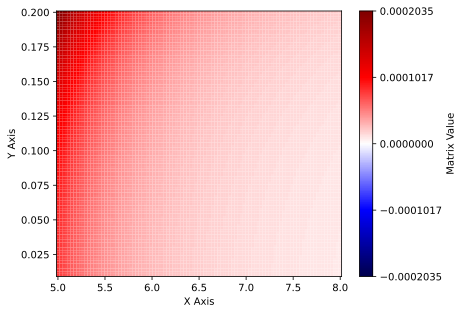

In [49]:
plt.pcolor(wc, detunings, zz_str_masked, cmap='seismic', vmin=-np.abs(zz_str_masked).max(), vmax=np.abs(zz_str_masked).max())

# Label the axes
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add colorbar with label, and make sure 0 is in the middle
cbar = plt.colorbar(label='Matrix Value')
cbar.set_ticks(np.linspace(-np.abs(zz_str_masked).max(), np.abs(zz_str_masked).max(), 5))

# Show the plot
plt.show()

In [50]:
wc[90]

7.699999999999999

In [51]:
detunings[50]

0.105

In [57]:
zz_str_masked[40, 99]

1.0618099800296932e-05